### 1. Pre-process and clean dataset

#### 1.1 Import data

In [34]:
import pandas as pd

data = pd.read_csv("data/heart.csv")
df = pd.DataFrame(data)

df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


#### 1.2 One hot encoding for categorical data

In [35]:
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_columns)], remainder='passthrough')
# df_encoded = ct.fit_transform(df)

# column_names = ct.get_feature_names_out()
# df_encoded = pd.DataFrame(df_encoded, columns=column_names)

# # Display the first 10 rows of the transformed DataFrame
# print(df_encoded.head(10))

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df_encoded.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
5,39,120,339,0,170,0.0,0,1,0,1,0,1,0,0,0,1
6,45,130,237,0,170,0.0,0,0,1,0,0,1,0,0,0,1
7,54,110,208,0,142,0.0,0,1,1,0,0,1,0,0,0,1
8,37,140,207,0,130,1.5,1,1,0,0,0,1,0,1,1,0
9,48,120,284,0,120,0.0,0,0,1,0,0,1,0,0,0,1


### 2. Exploratory data analysis

#### 2.1 Data visualizations

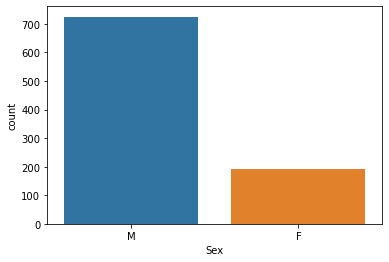

M    725
F    193
Name: Sex, dtype: int64


In [39]:
# Important to do age-map with gender
# Men with specific age groups are more prone to heart diseases. 

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Sex', data=df)
plt.show()


Unique ages : [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]


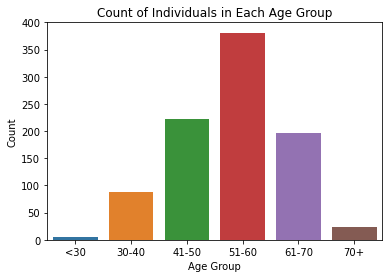

In [46]:
unique_ages = df['Age'].unique()
print(f"Unique ages : {sorted(unique_ages)}")

bins = [0, 30, 40, 50, 60, 70, float('inf')]
labels = ['<30', '30-40', '41-50', '51-60', '61-70', '70+']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

sns.countplot(x='AgeGroup', data=df)
plt.title("Count of Individuals in Each Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

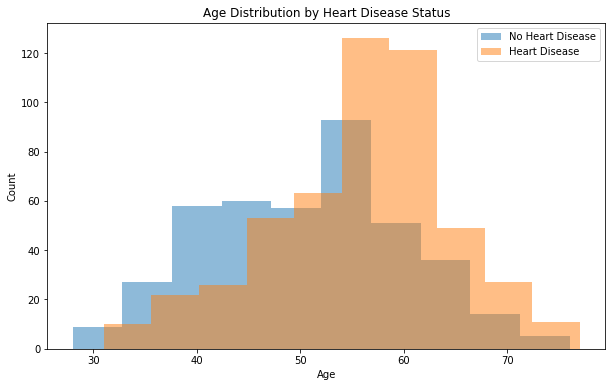

In [54]:
df_no_disease = df[df['HeartDisease'] == 0]
df_with_disease = df[df['HeartDisease'] == 1]

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(df_no_disease['Age'], alpha=0.5, label='No Heart Disease')
plt.hist(df_with_disease['Age'], alpha=0.5, label='Heart Disease')
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()